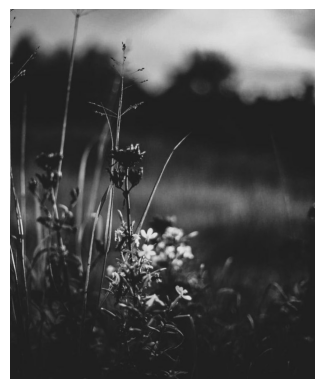

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('flowers2.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

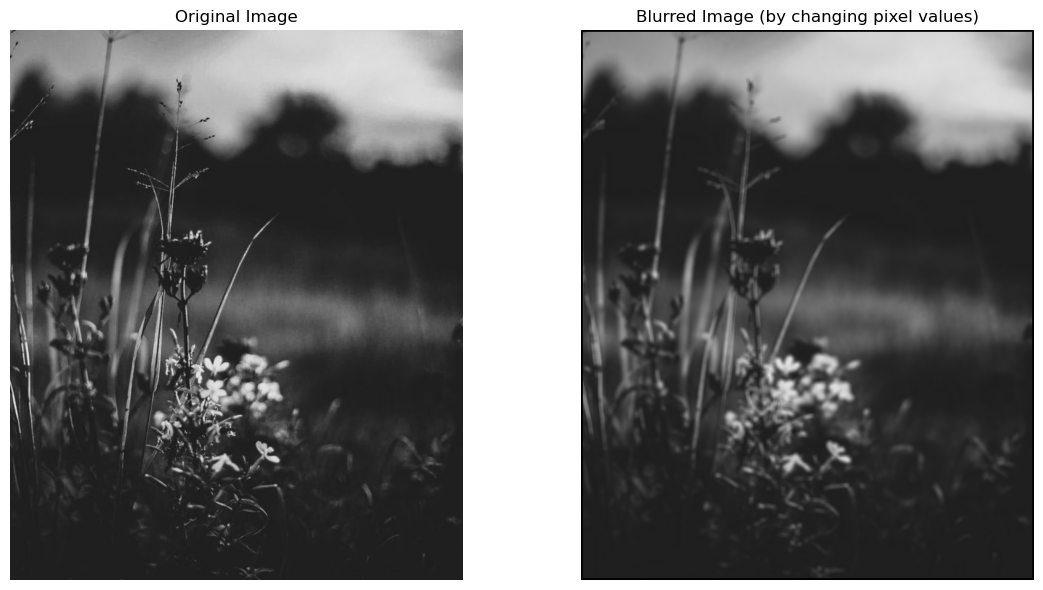

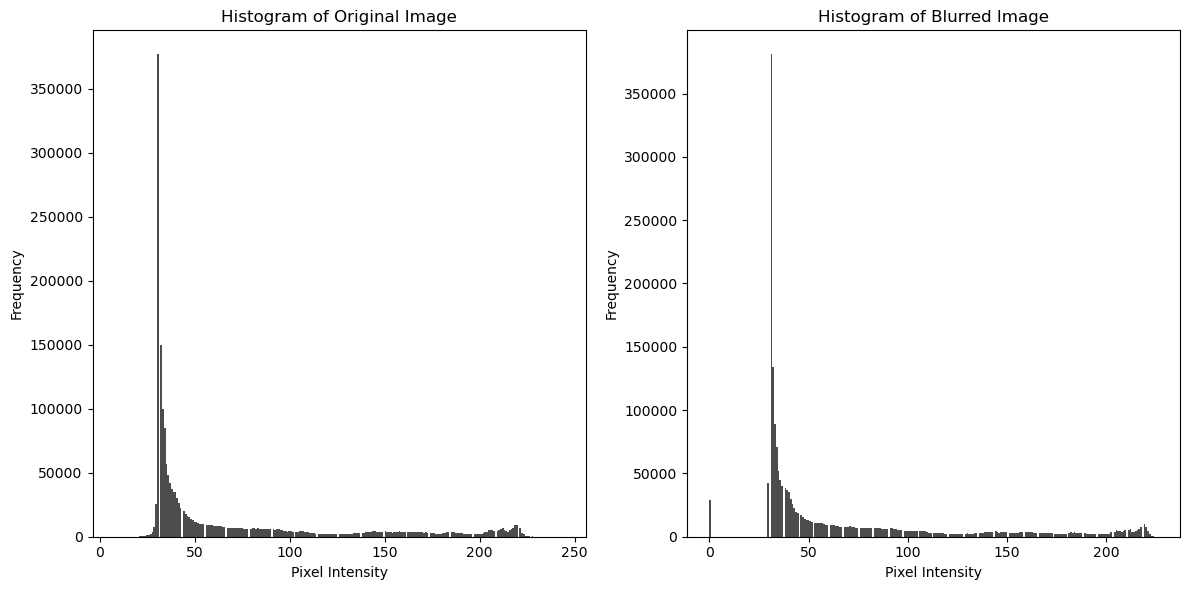

In [2]:
height, width, channels = image.shape
blurred_image = np.zeros_like(image)
kernel_size = 7
kernel_radius = kernel_size // 2
for i in range(kernel_radius, height - kernel_radius):
    for j in range(kernel_radius, width - kernel_radius):
        region = image[i - kernel_radius:i + kernel_radius + 1, j - kernel_radius:j + kernel_radius + 1]
        blurred_image[i, j] = np.mean(region)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image (by changing pixel values)')
plt.axis('off')
plt.tight_layout()
plt.show()
def plot_histogram(image, ax, title):
    ax.hist(image.flatten(), bins=256, color='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_histogram(image, axes[0], 'Histogram of Original Image')
plot_histogram(blurred_image, axes[1], 'Histogram of Blurred Image')
plt.tight_layout()
plt.show()


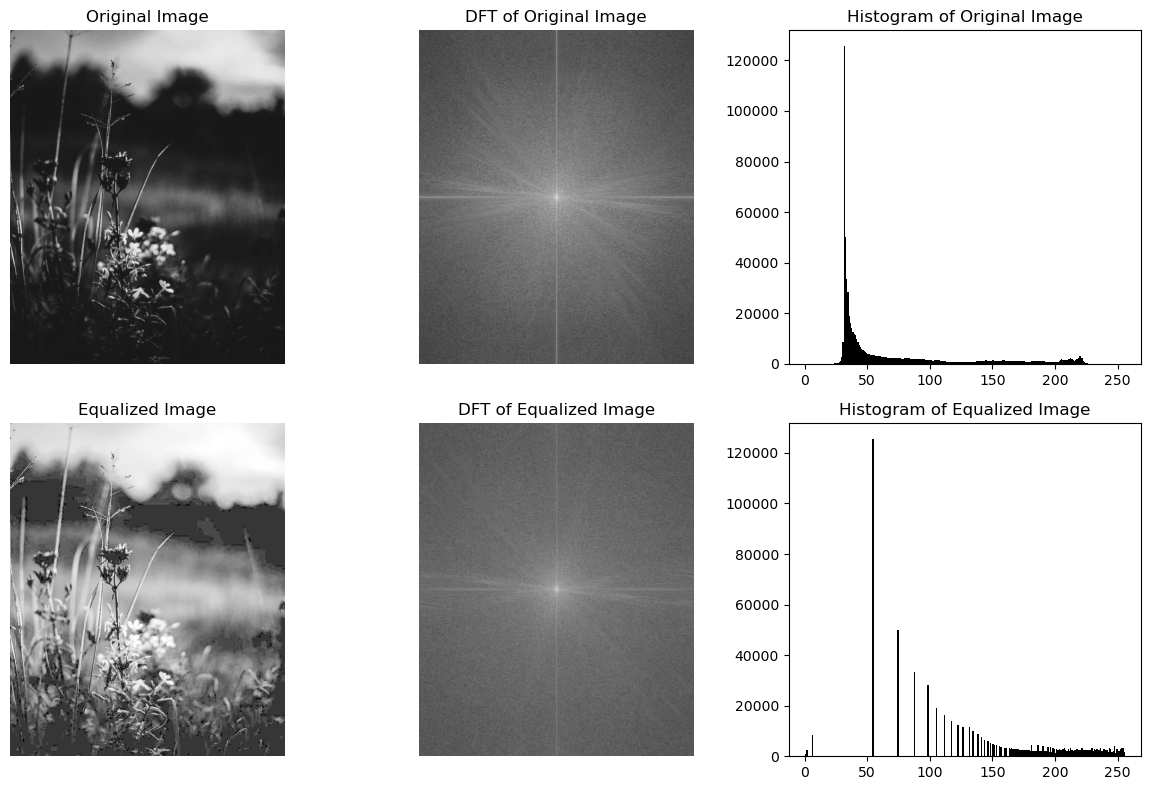

In [3]:
if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
image = np.uint8(image)
equalized_image = cv2.equalizeHist(image)
dft_original = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_original_shifted = np.fft.fftshift(dft_original)
magnitude_original = cv2.magnitude(dft_original_shifted[:,:,0], dft_original_shifted[:,:,1])
magnitude_original_log = np.log(magnitude_original + 1)
dft_equalized = cv2.dft(np.float32(equalized_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_equalized_shifted = np.fft.fftshift(dft_equalized)
magnitude_equalized = cv2.magnitude(dft_equalized_shifted[:,:,0], dft_equalized_shifted[:,:,1])
magnitude_equalized_log = np.log(magnitude_equalized + 1)
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(magnitude_original_log, cmap='gray')
plt.title('DFT of Original Image')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Histogram of Original Image')
plt.subplot(2, 3, 4)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(magnitude_equalized_log, cmap='gray')
plt.title('DFT of Equalized Image')
plt.axis('off')
plt.subplot(2, 3, 6)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Histogram of Equalized Image')
plt.tight_layout()
plt.show()

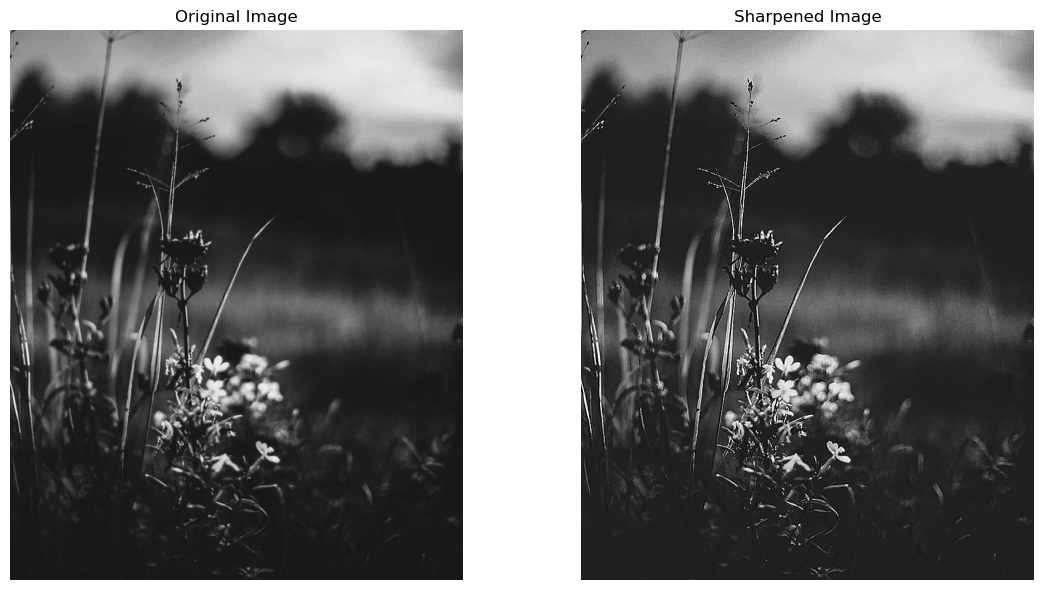

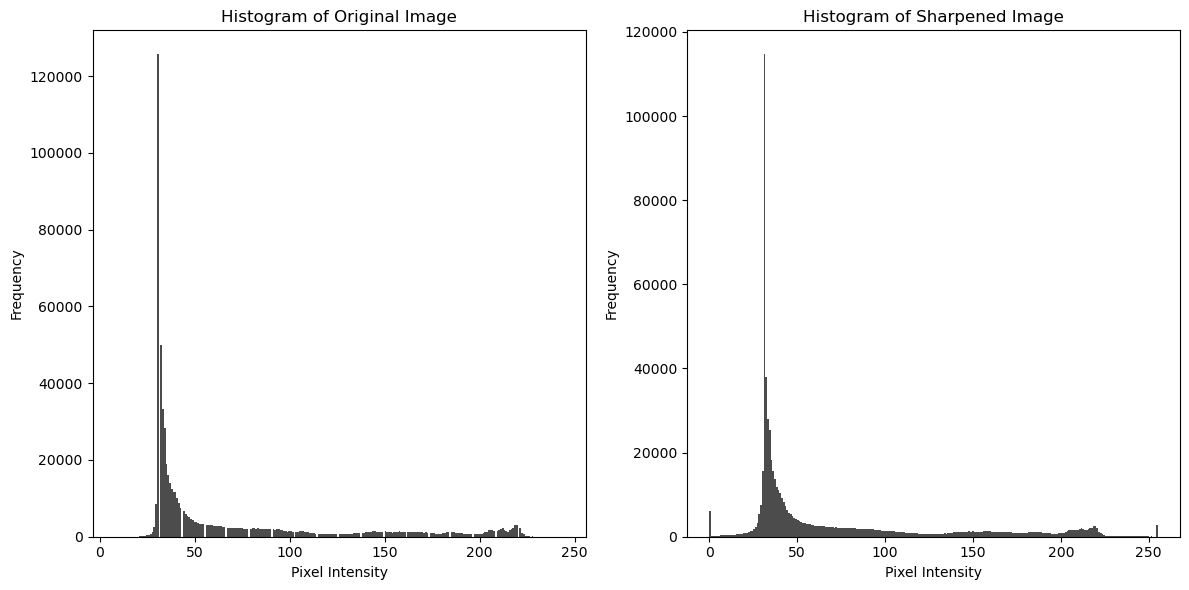

In [4]:
sharpening_kernel = np.array([[0, -1, 0],
                         		       [-1, 5, -1],
                              		       [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()

def plot_histogram(image, ax, title):
    ax.hist(image.flatten(), bins=256, color='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_histogram(image, axes[0], 'Histogram of Original Image')
plot_histogram(sharpened_image, axes[1], 'Histogram of Sharpened Image')

plt.tight_layout()
plt.show()


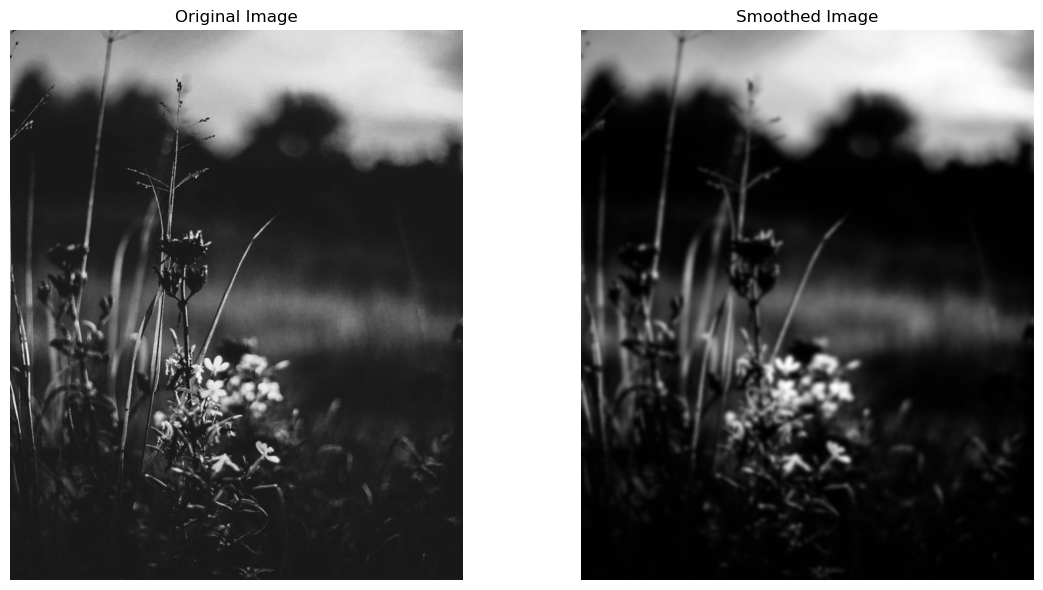

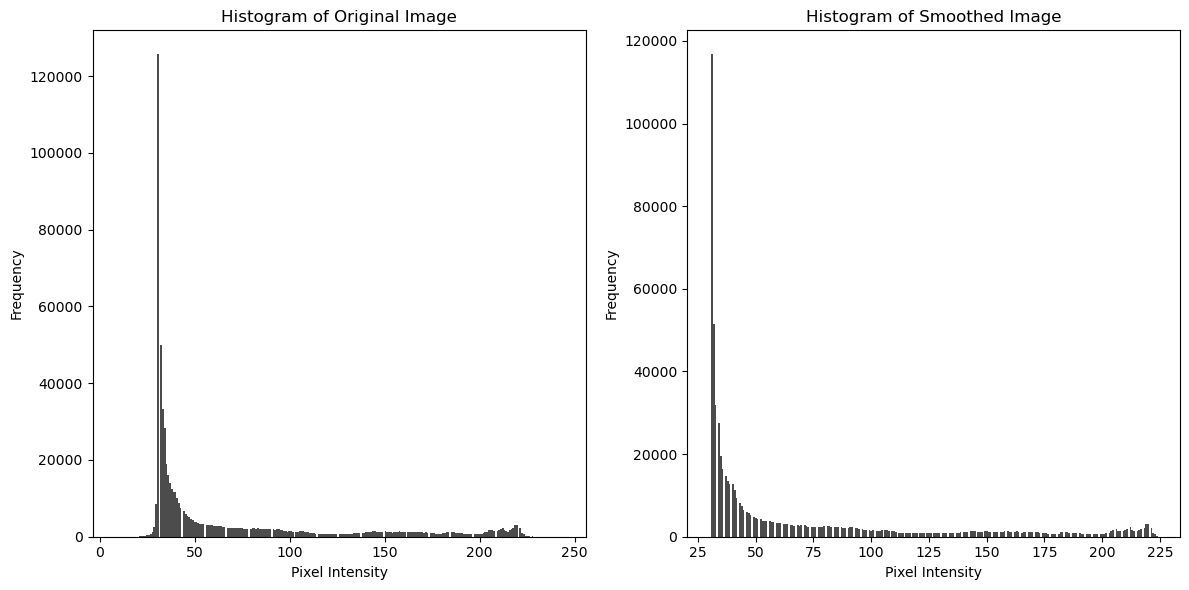

In [5]:
smoothed_image = cv2.GaussianBlur(image, (15, 15), 0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

def plot_histogram(image, ax, title):
    ax.hist(image.flatten(), bins=256, color='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_histogram(image, axes[0], 'Histogram of Original Image')
plot_histogram(smoothed_image, axes[1], 'Histogram of Smoothed Image')

plt.tight_layout()
plt.show()


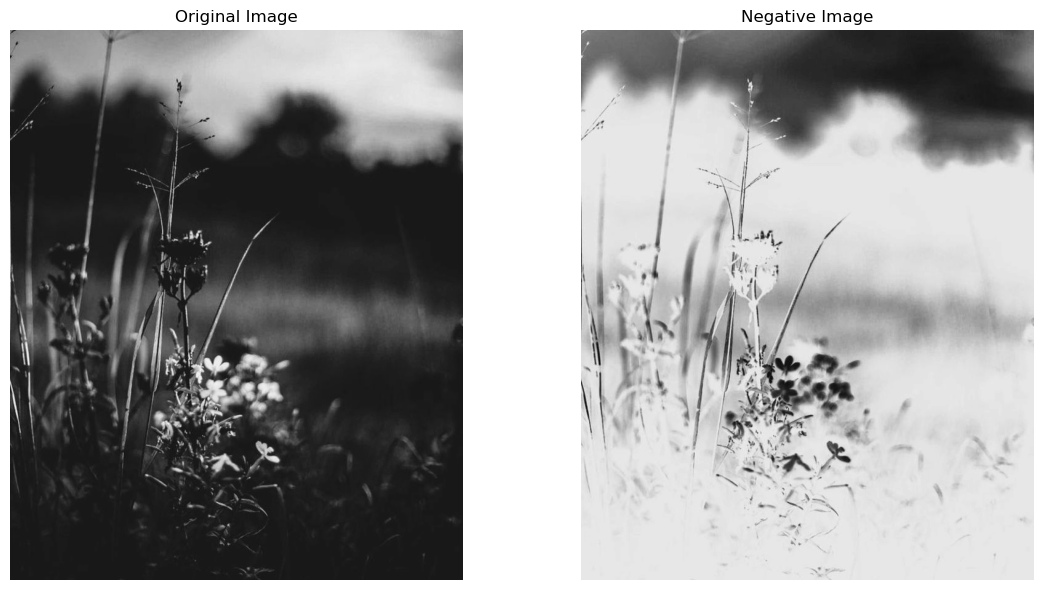

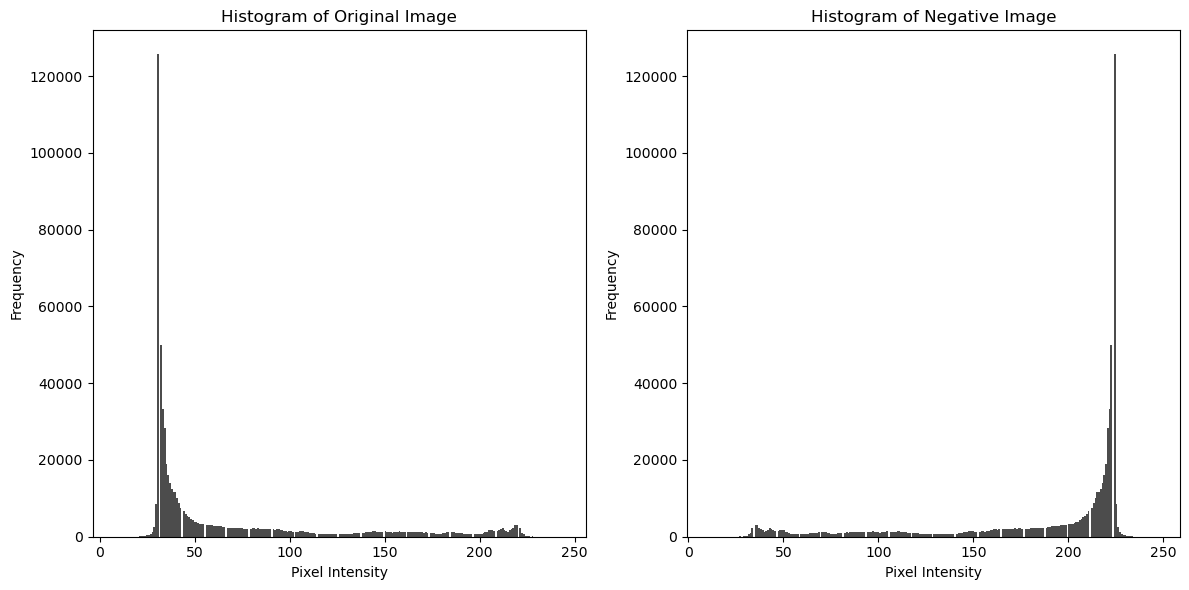

In [6]:
negative_image = 255 - image

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.tight_layout()
plt.show()

def plot_histogram(image, ax, title):
    ax.hist(image.flatten(), bins=256, color='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_histogram(image, axes[0], 'Histogram of Original Image')
plot_histogram(negative_image, axes[1], 'Histogram of Negative Image')

plt.tight_layout()
plt.show()


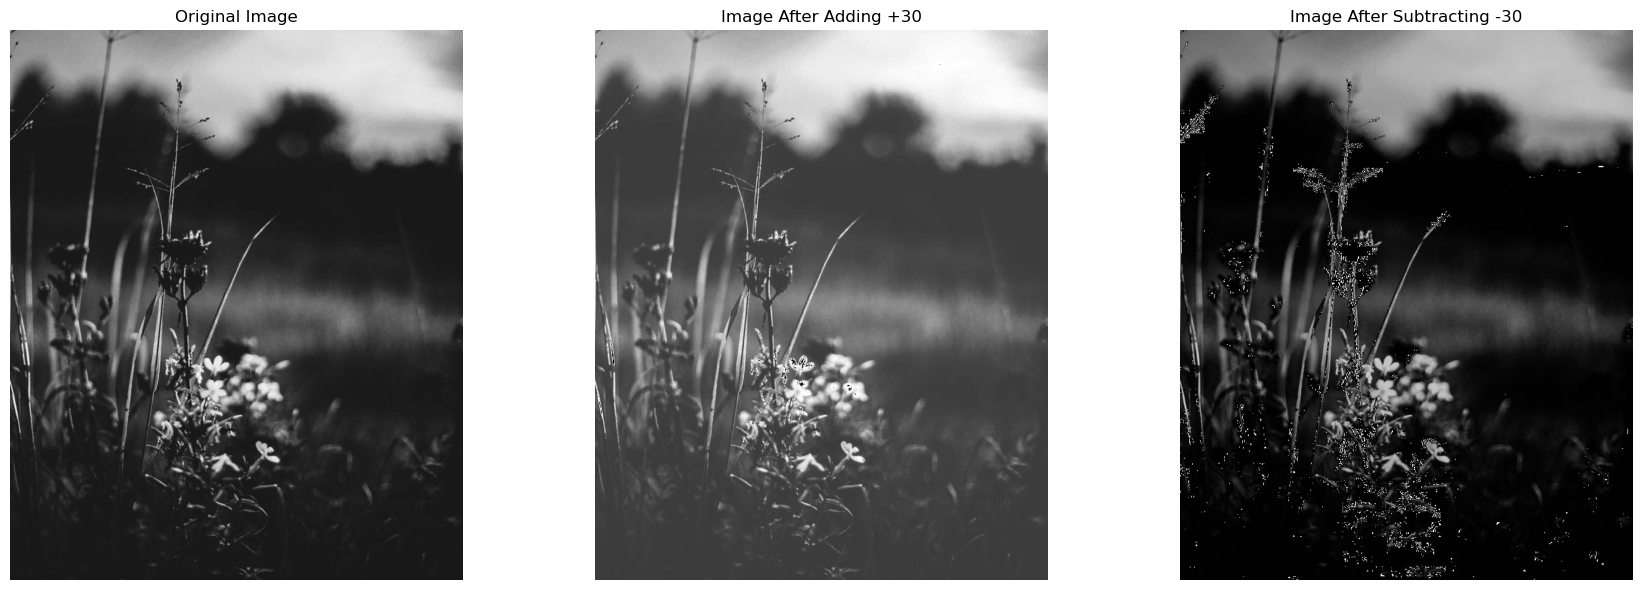

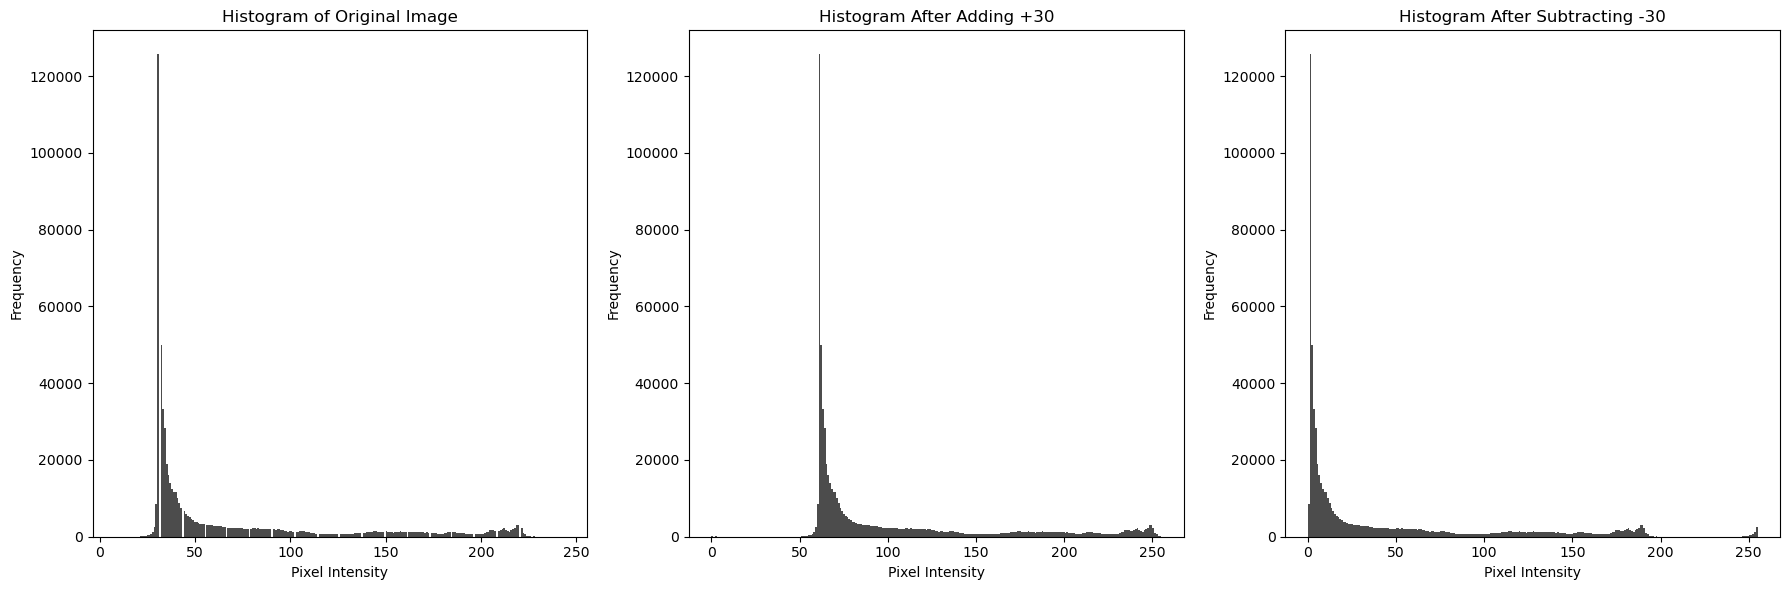

In [7]:
increased_image = np.clip(image + 30, 0, 255).astype(np.uint8)
darkened_image = np.clip(image - 30, 0, 255).astype(np.uint8)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(increased_image, cmap='gray')
plt.title('Image After Adding +30')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(darkened_image, cmap='gray')
plt.title('Image After Subtracting -30')
plt.axis('off')
plt.tight_layout()
plt.show()

def plot_histogram(image, ax, title):
    ax.hist(image.flatten(), bins=256, color='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plot_histogram(image, axes[0], 'Histogram of Original Image')
plot_histogram(increased_image, axes[1], 'Histogram After Adding +30')
plot_histogram(darkened_image, axes[2], 'Histogram After Subtracting -30')

plt.tight_layout()
plt.show()


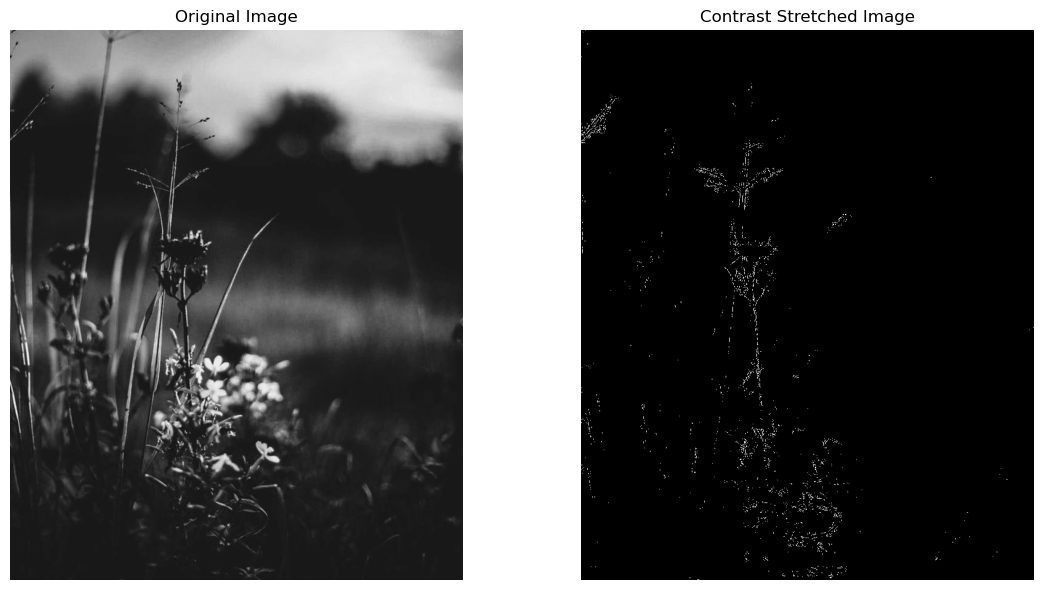

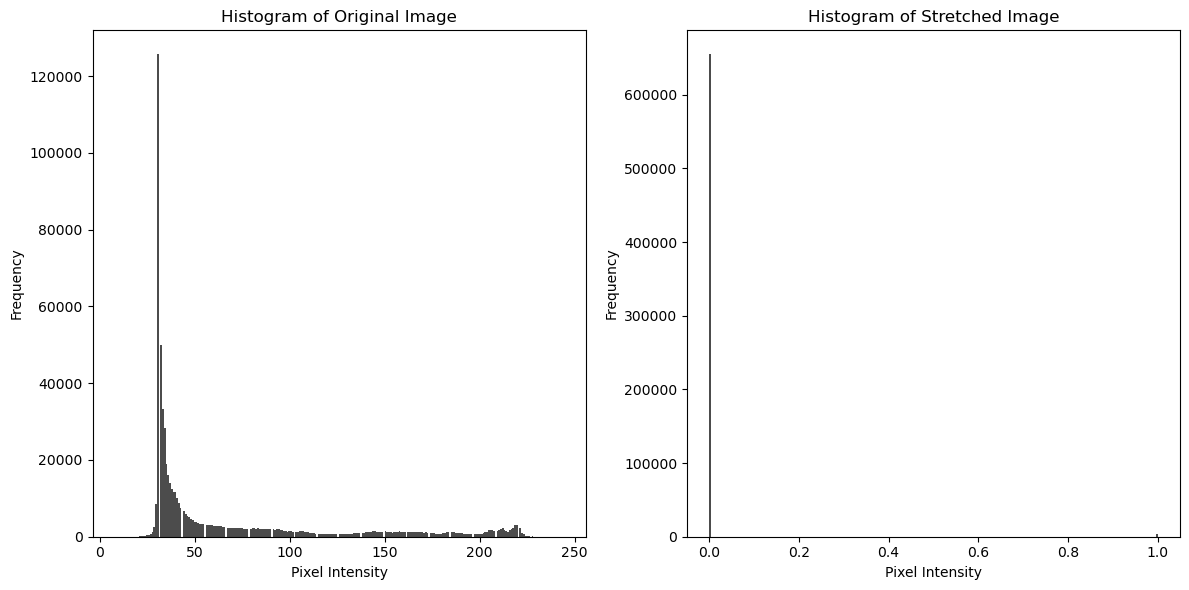

In [8]:
I_min = np.min(image)
I_max = np.max(image)
stretched_image = np.clip(((image - I_min) * 255) / (I_max - I_min), 0, 255).astype(np.uint8)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')
plt.tight_layout()
plt.show()
def plot_histogram(image, ax, title):
    ax.hist(image.flatten(), bins=256, color='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_histogram(image, axes[0], 'Histogram of Original Image')
plot_histogram(stretched_image, axes[1], 'Histogram of Stretched Image')
plt.tight_layout()
plt.show()
